# Laboratorium 8. Wizja Komputerowa

**Uwaga:** Poniższy notebook jest stworzony z myślą o uruchamianiu go w [Colaboratory](https://colab.research.google.com/), oznacza to, że przygotowane zadania zakładają uczenie modelu z użyciem GPU. Na zajęciach zostanie krótko omówione używanie Colaboratory. Na własną odpowiedzialność można używać własnego komputera do rozwiązania pracy domowej.

In [1]:
import torch
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### CIFAR10
[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) to dataset zawierający 60 tysięcy kolorowych obrazków rozmiaru 32 $\times$ 32 pikseli należących do 10 różnych klas. Poniżej przykładowe wizualizacje.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
CIFAR10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


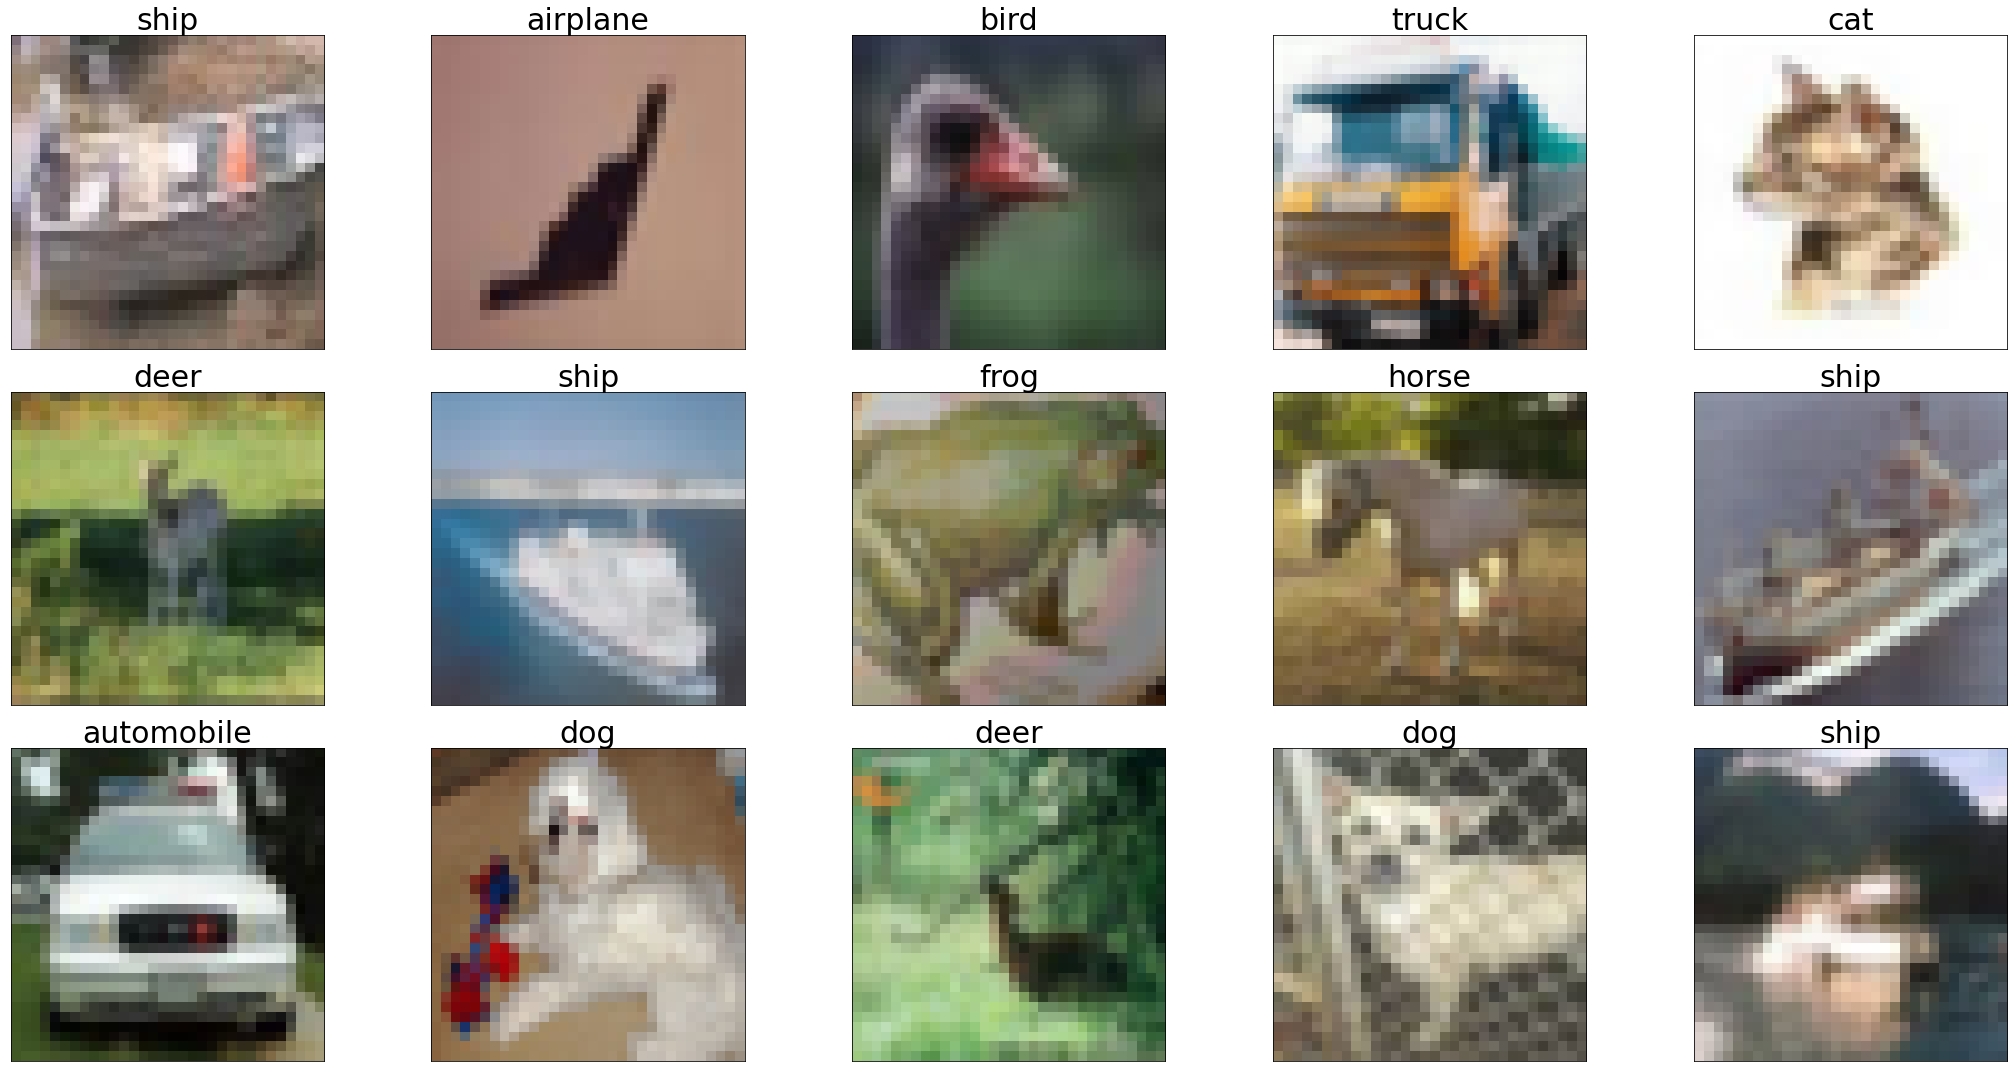

In [2]:
dataset = CIFAR10(root='.', train=True, transform=ToTensor(), download=True)
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# get a single batch
for x, y in loader:
    break

# prepare visualisations
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ind = 5 * i + j
        ax.imshow(np.transpose(x[ind], (1, 2, 0)))
        ax.set_title(f"{dataset.classes[y[ind]]}", fontdict={'size': 30})
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()

print(f"CIFAR10 classes: {dataset.classes}")

### Zadanie 1. Sieć Konwolucyjna na CIFAR10 (4 pkt.)

Zadaniem jest zaimplementowanie "od zera" sieci konwolucyjnej do klasyfikacji wieloklasowej na zbiorze CIFAR10. Należy zaimplementować zarówno model jak i pętle uczenia oraz ewaluacji. Twój kod powinien raportować *loss* w trakcie trenowania, testowania oraz *accuracy* na zbiorze testowym (opcjonalnie również na treningowym). Na koniec *accuracy* powinno osiągnąć wynik powyżej 75% na zbiorze testowym. Można korzystać z dowolnych mechanizmów dostępnych w PyTorchu.

Porady do zadania:

* Zwiększenie treningowego *batch size* może przyspieszyć uczenie, ale należy pamiętać, że, tak jak każdy hiperparametr, *batch_size* ma wpływ na proces uczenia.
* Przy dobieraniu architektury bądź hiperparametrów nie testować dłużej niż kilka epok (około 5), tak aby mieć szybki feedback. Dopiero po dobraniu powyższych rzeczy puścić dłuższe uczenie. Warto przy okazji wizualizować krzywe uczenia (funkcji kosztu) aby zwrócić uwagę na to kiedy koszt zaczyna się "wypłaszczać" i czy model przypadkowo nie overfituje (patrząc na wartości kosztu na zbiorze testowym)
* Dodatkowe (nadobowiązkowe) rzeczy do poprawienia wyniku: LR Schedule, Early Stopping.

In [3]:
# tutaj zdefiniuj swój model, nie zapomnij o dziedziczeniu z torch.nn.Module
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
                torch.nn.BatchNorm2d(32),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=2),
                torch.nn.Dropout(0.2),

                torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
                torch.nn.BatchNorm2d(64),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=2),

                torch.nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),

                torch.nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3, padding = 1),
                torch.nn.BatchNorm2d(64),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=2),

                torch.nn.Flatten(),
                torch.nn.Linear(64*4*4, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 10),

        )

    def forward(self, x):
        return self.model(x)

In [5]:
# tutaj uzupełnij ładowanie danych treningowych i testowych
transform =Compose([ToTensor(),Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True,
                        transform=transform)

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True,
                       transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10: Training loss = 1.2249127616885376
Epoch 2/10: Training loss = 0.8324562104100687
Epoch 3/10: Training loss = 0.6912614783261422
Epoch 4/10: Training loss = 0.5966608776965358
Epoch 5/10: Training loss = 0.5151986054508868
Epoch 6/10: Training loss = 0.44948253250053427
Epoch 7/10: Training loss = 0.39007811782189233
Epoch 8/10: Training loss = 0.3359788170648037
Epoch 9/10: Training loss = 0.2960153090733599
Epoch 10/10: Training loss = 0.2567793946768028
Test set accuracy = 80.78 %
Test loss = 0.6598115861415863


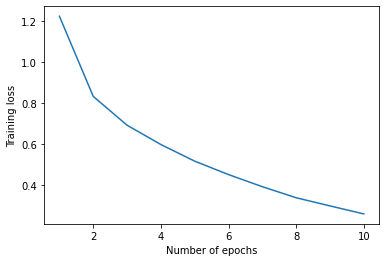

In [6]:
# tutaj zaimplementuj pętle uczenia ze wszystkimi potrzebnymi hiperparametrami
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
num_epochs = 10
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
    
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")
    
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


test_acc=0
model.eval()
test_loss = 0

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        y_true = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, y_true)
        test_loss += loss.item()
        _, y_pred = torch.max(outputs.data, 1)
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")
    print(f"Test loss = {test_loss/len(test_loader)}")

## Augmentacje

Pakiet `torchvision` implementuje wiele różnych transformacji do danych, część z nich jest użyteczna do tzw. augmentacji danych. Augmentacja danych to mechanizm "sztucznego" zwiększania datasetu treningowego poprzez dodawanie do niego zmodyfikowanych kopii danych, które już w nim istnieją. Augmentacja jest szczególnie użyteczna kiedy nasz dataset ma małą liczbę przykładów do uczenia skomplikowanych sieci neuronowych. 

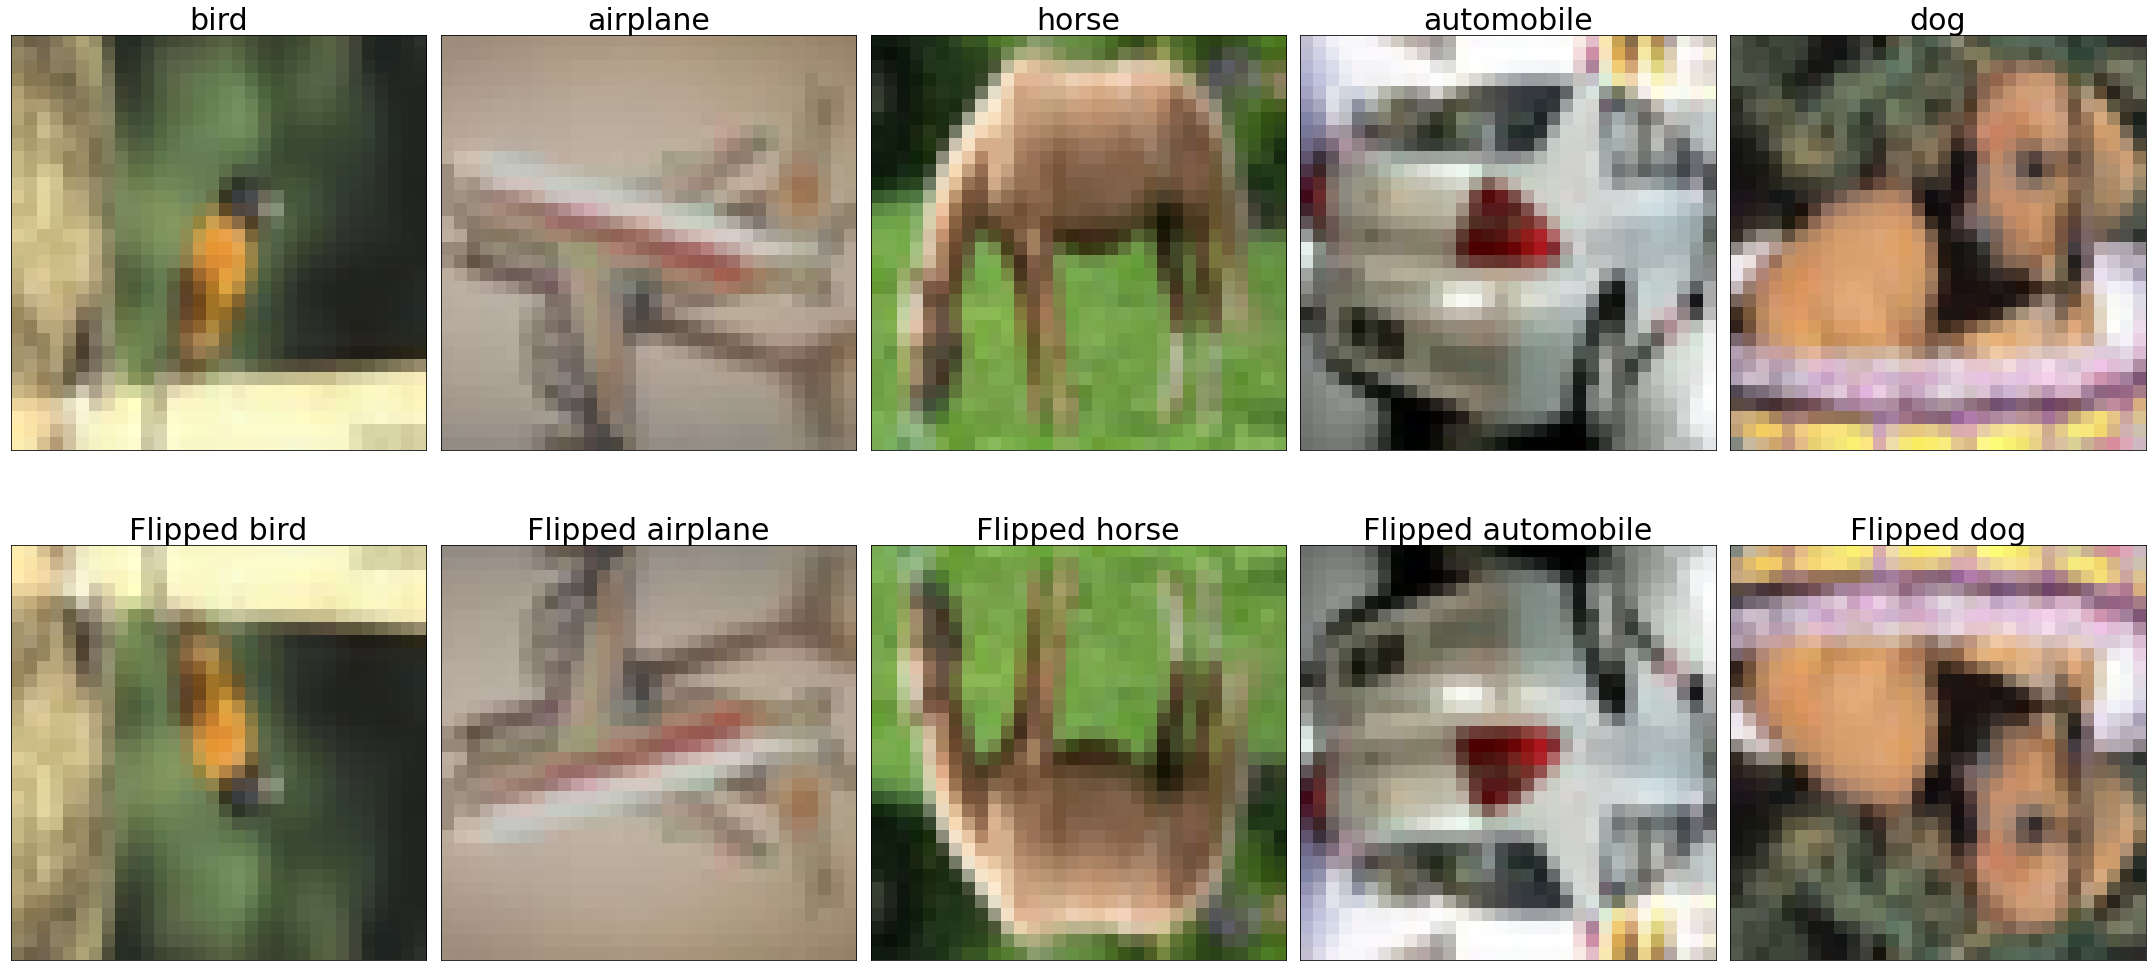

In [7]:
from torchvision.transforms import RandomVerticalFlip

# load test set
dataset = CIFAR10(root='.', train=True, transform=ToTensor())
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# prepare a random flip
flip = RandomVerticalFlip(p=1) 

# load some data
for x, y in loader:
    break
    

# visualise the flipping
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 15))

for img, label, ax in zip(x, y, axes[0]):
    ax.imshow(np.transpose(img, (1, 2, 0)))
    ax.set_title(f"{dataset.classes[label]}", fontdict={'size': 30})
    ax.set_xticks([])
    ax.set_yticks([])
    
for img, label, ax in zip(x, y, axes[1]):
    ax.imshow(np.transpose(flip(img), (1, 2, 0)))
    ax.set_title(f"Flipped {dataset.classes[label]}", fontdict={'size': 30})
    ax.set_xticks([])
    ax.set_yticks([])


fig.tight_layout()

### Zadanie 2. Augmentacja danych (1 pkt.)

Używając funkcjonalności dostępnych w [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) dodaj augmentacje danych do datasetu treningowego, zobacz o ile poprawia to wynik twojego modelu z poprzedniego zadania. W razie wątpliwości najlepiej przeszukać internet w poszukiwaniu typowych augmentacji dla CIFAR10.

In [10]:
# tutaj dodaj wybrane augumentcje danych treningowych i załaduj testowe
import torchvision.transforms as transforms

transformRandom =Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomInvert(p=0.2),
    transforms.RandomGrayscale(0.2),
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True,
                        transform=transformRandom)

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True,
                       transform=transformRandom)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/10: Training loss = 1.4826243406522754
Epoch 2/10: Training loss = 1.1270252489845338
Epoch 3/10: Training loss = 1.0011590675749384
Epoch 4/10: Training loss = 0.9058196726359393
Epoch 5/10: Training loss = 0.8439081059345739
Epoch 6/10: Training loss = 0.7927736859823448
Epoch 7/10: Training loss = 0.7573908924560705
Epoch 8/10: Training loss = 0.7154197105404969
Epoch 9/10: Training loss = 0.6921429702641486
Epoch 10/10: Training loss = 0.6638970645531888
Test set accuracy = 74.89 %
Test loss = 0.7176857888698578


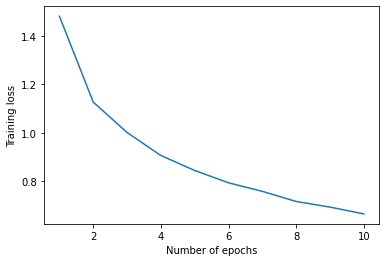

In [11]:
# tutaj powtórz pętle uczenia z poprzedniego zadania
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
num_epochs = 10
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
    
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")
    
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


test_acc=0
model.eval()
test_loss = 0

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        y_true = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, y_true)
        test_loss += loss.item()
        _, y_pred = torch.max(outputs.data, 1)
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")
    print(f"Test loss = {test_loss/len(test_loader)}")

## Ataki Adwersarialne

Jednym z (ciągle nierozwiązanych) problemów w sieciach neuronowych, zwłaszcza systemów wizyjnych są tzw. ataki adwersarialne. Przy takim ataku, "agresor" ma pewien ograniczony dostęp do modelu (np. dostęp do logitów na wyjściu sieci) i używając tych informacji jest w stanie tak zmodyfikować wejście do sieci w takim sposób aby uzyskać błędne, a nawet specyficzne wyjście. Poniższy kod prezentuje metodę **F**ast **G**radient **S**ign **M**ethod, która modyfikuje wejście do sieci za pomocą gradientu funkcji kosztu po tym wejściu.

<font size=4>$$ \hat{x} = x + \epsilon \textit{sign}\big(\nabla_x \mathcal{L}(x, y)\big) $$ </font>

In [12]:
from torchvision.models import inception_v3
from torchvision.transforms import Compose, Resize, ToTensor
import torch.nn as nn
import numpy as np

from PIL import Image
import urllib.request
import io
import json 

In [13]:
# cast to tensor and resize to for inception v3
preprocess = Compose([Resize((299,299)), ToTensor()])

# some prepared images
img_names = ['bird.jpg', 'cat.jpg', 'dog.jpg', 'frog.jpg']
imgs_url = 'https://raw.githubusercontent.com/gmum/ml2022-23/master/lab/resources/'

# get images 
imgs = []
for img_name in img_names:
    url = imgs_url + '/' + img_name
    with urllib.request.urlopen(url) as u:
        f = io.BytesIO(u.read())

    img = preprocess(Image.open(f))
    imgs.append(img)
    
imgs = torch.stack(imgs)

# get ImageNet classes list
labels_url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
with urllib.request.urlopen(labels_url) as url:
    s = url.read().decode("utf-8")
    labels = json.loads(s)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

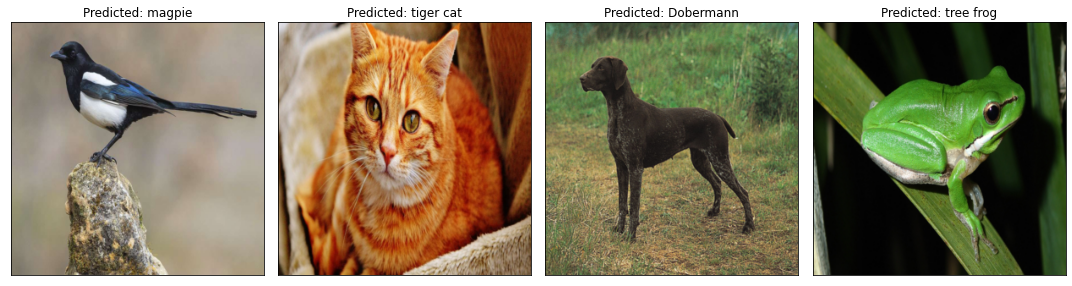

In [14]:
# load inception model 
model = inception_v3(pretrained=True) 
# set to eval, we don't want to modify it
model.eval()

# run the images through the model
output = model(imgs)
pred = torch.argmax(output, 1)

# visualisation
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
for ax, img, p in zip(axes, imgs, pred):
    ax.imshow(np.transpose(img.detach(), (1,2,0)))
    ax.set_title(f"Predicted: {labels[p]}")
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

In [15]:
# prepare loss function for the method
loss = nn.CrossEntropyLoss()

# eps parameter for the FGSM
eps = 0.02

# inputs need to have gradients enabled!
imgs.requires_grad = True

# run the model and calculate the loss
outputs = model(imgs)
cost = loss(outputs, pred)

# get input gradients
grad = torch.autograd.grad(cost, imgs, create_graph=False)[0]

# FGSM 
adv_imgs = imgs + eps * grad.sign()
# clamp to the image range
adv_imgs = torch.clamp(adv_imgs, min=0, max=1).detach()
# save gradients for visualisation
grads = torch.clamp(grad.sign(), min=0, max=1).detach()

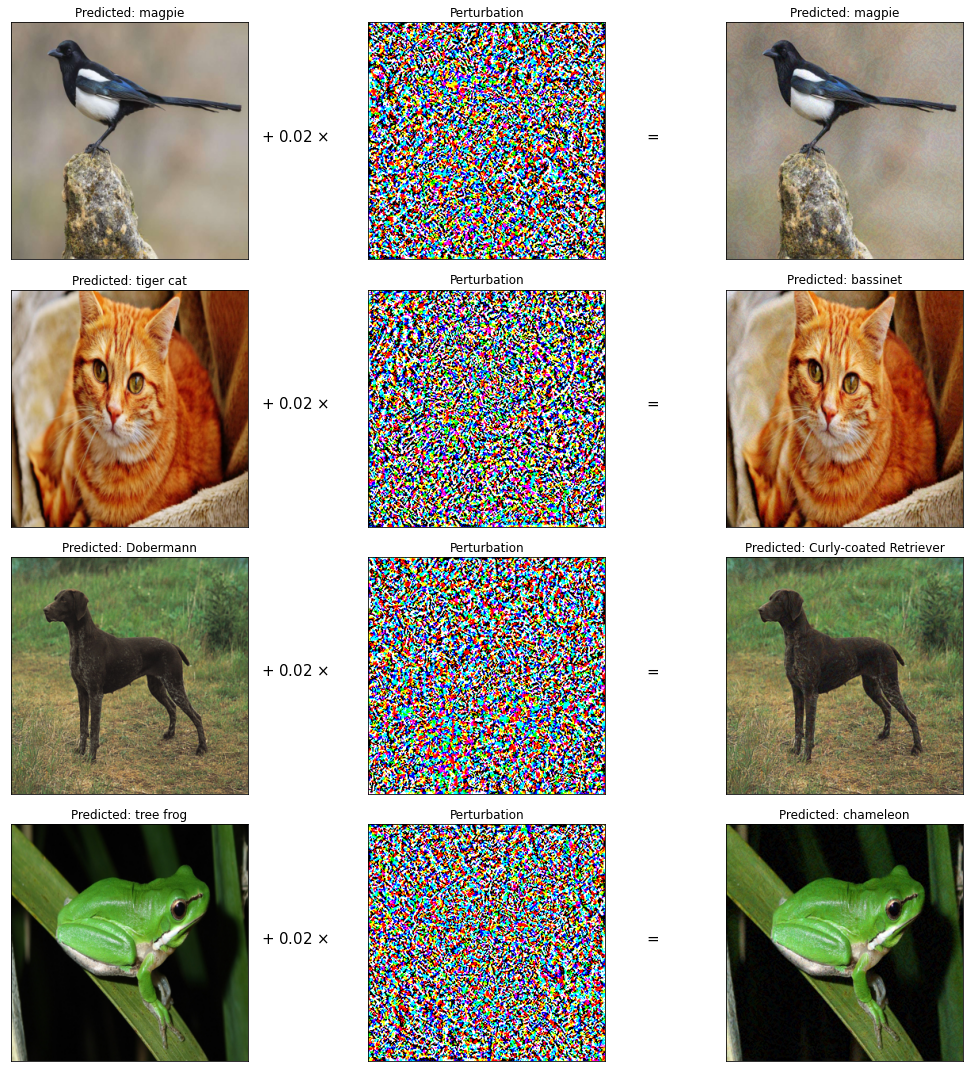

In [16]:
# run the advesarial samples through the network
output = model(adv_imgs)
adv_pred = torch.argmax(output, 1)

# visualisation
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for row, img, adv, p, adv_p, g in zip(axes, imgs, adv_imgs, pred, adv_pred, grads):
    row[0].imshow(np.transpose(img.detach(), (1,2,0)))
    row[0].set_title(f"Predicted: {labels[p]}")
    row[0].set_xticks([])
    row[0].set_yticks([])
    
    row[0].text(1.2,0.5, fr"+ {eps} $\times$", size=15, ha="center", transform=row[0].transAxes)
    
    row[1].imshow(np.transpose(g, (1,2,0)))
    row[1].set_title(f"Perturbation")
    row[1].set_xticks([])
    row[1].set_yticks([])
    
    row[1].text(1.2,0.5, "=", size=15, ha="center", transform=row[1].transAxes)
    
    row[2].imshow(np.transpose(adv.detach(), (1,2,0)))
    row[2].set_title(f"Predicted: {labels[adv_p]}")
    row[2].set_xticks([])
    row[2].set_yticks([])
    
fig.tight_layout()

### Zadanie 3. Przykłady Adwersarialne (2 pkt.)
1. Zobacz dla jakiego $\epsilon$ metoda FGSM zmieni predykcje dla Sroki z powyższego przykładu.
2. Zastosuj metodę FGSM dla swojego modelu i 4 losowych przykładów z CIFAR10 tak aby uzyskać wizualizacje podobną do powyższej.

`HINT`: Normalizacja, której normalnie używamy sprawia, że obrazki wychodzą poza typowe $[0, 1]$, można rozwiązać ten problem na dwa sposoby: <br> 1) "odwrócić" normalizację znając użyte średnią i odchylenie standardowe, <br> 2) nie używać normalizacji.

In [17]:
# tutaj załaduj 4 losowe przykłady ze zbioru testowego, uważaj na normalizację!
from torch.utils.data import random_split
test_dataset = CIFAR10(root='.', train=False, transform=ToTensor(), download=True)

random_seed = 42
torch.manual_seed(random_seed)

four_size = 4
other_size = len(test_dataset) - four_size

four_ds, other_ds = random_split(test_dataset, [four_size, other_size])

Files already downloaded and verified


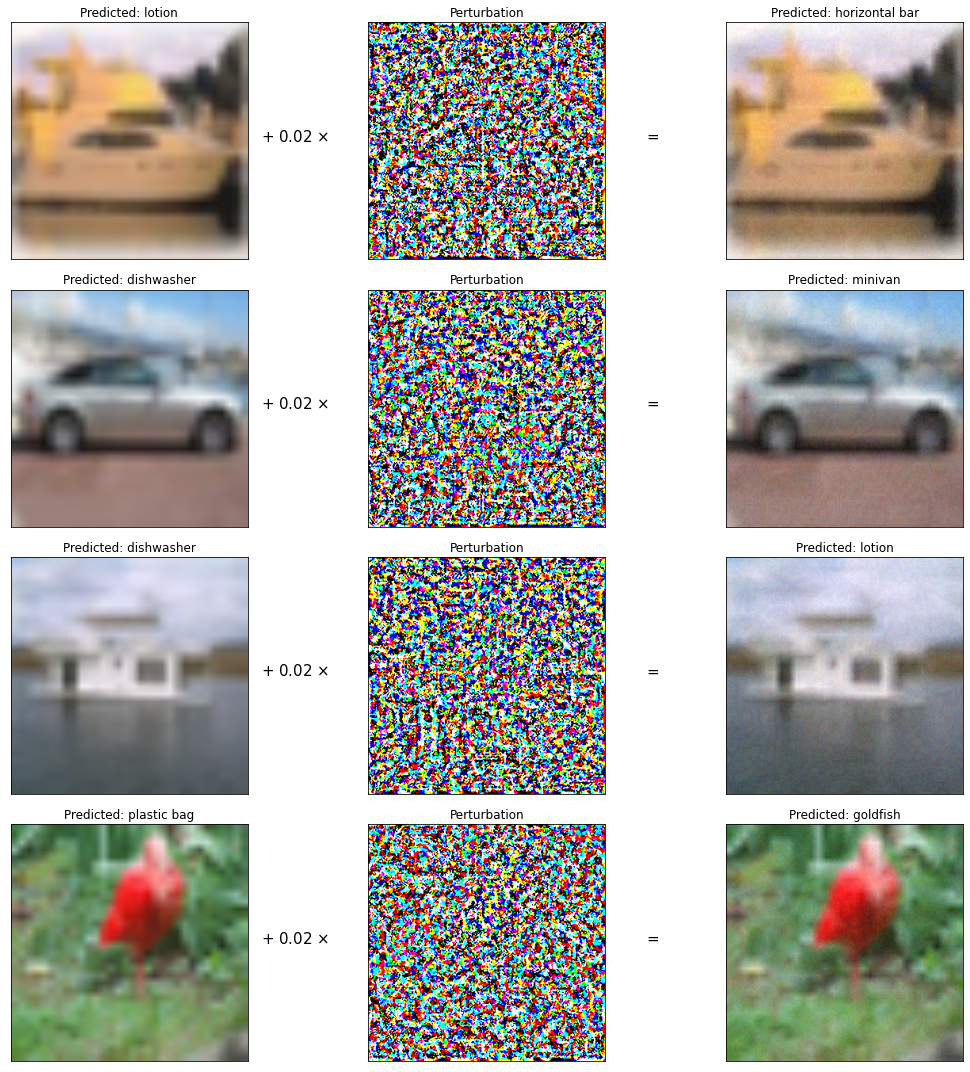

In [18]:
# tutaj zastosuj metode FGSM do wygenerowania przykładów adwersarialnych
import torchvision.transforms
model = inception_v3(pretrained=True) 
model.eval()

transform = torchvision.transforms.Resize(size = (299,299))
four_imgs = torch.stack((
    transform(four_ds[0][0]), 
    transform(four_ds[1][0]), 
    transform(four_ds[2][0]), 
    transform(four_ds[3][0])))

imgs = four_imgs

output = model(imgs)
pred = torch.argmax(output, 1)
loss = nn.CrossEntropyLoss()
eps = 0.02
imgs.requires_grad = True
outputs = model(imgs)
cost = loss(outputs, pred)

grad = torch.autograd.grad(cost, imgs, create_graph=False)[0]

adv_imgs = imgs + eps * grad.sign()
adv_imgs = torch.clamp(adv_imgs, min=0, max=1).detach()
grads = torch.clamp(grad.sign(), min=0, max=1).detach()



output = model(adv_imgs)
adv_pred = torch.argmax(output, 1)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for row, img, adv, p, adv_p, g in zip(axes, imgs, adv_imgs, pred, adv_pred, grads):
    row[0].imshow(np.transpose(img.detach(), (1,2,0)))
    row[0].set_title(f"Predicted: {labels[p]}")
    row[0].set_xticks([])
    row[0].set_yticks([])
    
    row[0].text(1.2,0.5, fr"+ {eps} $\times$", size=15, ha="center", transform=row[0].transAxes)
    
    row[1].imshow(np.transpose(g, (1,2,0)))
    row[1].set_title(f"Perturbation")
    row[1].set_xticks([])
    row[1].set_yticks([])
    
    row[1].text(1.2,0.5, "=", size=15, ha="center", transform=row[1].transAxes)
    
    row[2].imshow(np.transpose(adv.detach(), (1,2,0)))
    row[2].set_title(f"Predicted: {labels[adv_p]}")
    row[2].set_xticks([])
    row[2].set_yticks([])
    
fig.tight_layout()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10: Training loss = 1.500024284831393
Epoch 2/10: Training loss = 1.1233612539405176
Epoch 3/10: Training loss = 0.9844930242897224
Epoch 4/10: Training loss = 0.9137966956225864
Epoch 5/10: Training loss = 0.8556593733381478
Epoch 6/10: Training loss = 0.8064066276707408
Epoch 7/10: Training loss = 0.7599226262275027
Epoch 8/10: Training loss = 0.723437603093536
Epoch 9/10: Training loss = 0.6984727059944424
Epoch 10/10: Training loss = 0.6736428299948564


TypeError: ignored

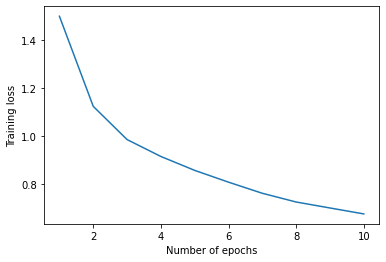

In [19]:
# tutaj przetestuj swój model i użyj wizualizacji z powyższego przykładu
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon*sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image



import torchvision.transforms as transforms

transformRandom =Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomInvert(p=0.2),
    transforms.RandomGrayscale(0.2),
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True,
                        transform=transformRandom)

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True,
                       transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
num_epochs = 10
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
    
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")
    
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


test_acc=0
model.eval()
test_loss = 0

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        y_true = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, y_true)
        test_loss += loss.item()
        _, y_pred = torch.max(outputs.data, 1)
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")
    print(f"Test loss = {test_loss/len(test_loader)}")